설치 후, 런타임 재시작 해야함

In [17]:
# !pip install konlpy
# !pip install mecab-python
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [18]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [19]:
# !pip install KoNLPy

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [22]:
%cd '/content/drive/MyDrive/통계분석/8장_data'

/content/drive/MyDrive/통계분석/8장_data


open()함수와 with open()

In [23]:
import json

input = '/content/drive/MyDrive/통계분석/8장_data/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명.json'

file = open(input, 'r', encoding= 'utf-8')
data = json.load(file)

file.close() #반드시 닫아줘야함
print(data)

[{'created_time': '2018-06-20 18:06:39', 'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/', 'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.', 'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"', 'post_id': '407886705912407_1981346601899735', 'total_comments': 3}, {'created_time': '2018-06-14 10:41:16', 'link': 'http://www.etnews.com/20180612000347', 'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.', 'name': '기술력 갖춘 로봇기업 몸값 치솟는다', 'post_id': '407886705912407_1971252229575839', 'total_comments': 0}, {'created_time': '2018-04-10 17:42:00', 'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001', 'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...', 'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종", 'post_id': '407886705912407_19007381332939

In [24]:
#with open : 자동을 닫힘

input = '/content/drive/MyDrive/통계분석/8장_data/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명'

with open(input + '.json','r', encoding='utf-8') as file:
    data = json.load(file)
data

[{'created_time': '2018-06-20 18:06:39',
  'link': 'https://www.facebook.com/etnews.kr/videos/1981346601899735/',
  'message': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.',
  'name': '6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"',
  'post_id': '407886705912407_1981346601899735',
  'total_comments': 3},
 {'created_time': '2018-06-14 10:41:16',
  'link': 'http://www.etnews.com/20180612000347',
  'message': '로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다.',
  'name': '기술력 갖춘 로봇기업 몸값 치솟는다',
  'post_id': '407886705912407_1971252229575839',
  'total_comments': 0},
 {'created_time': '2018-04-10 17:42:00',
  'link': 'http://www.etnews.com/20180409000360?mc=em_002_00001',
  'message': '4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...',
  'name': "휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종",
  'post_id': '

In [25]:
message = ""

seen_messages = set() #중복 메시지 추적하기 위한 집합
for item in data:
    if 'message' in item.keys():
        new_message = re.sub(r'[^\w]','',item['message'])
        if new_message not in seen_messages:
            seen_messages.add(new_message)
            message += new_message
            # print(new_message) # 전처리된 새로운 메시지
print()
print(message) # 각 단계별로 보고 싶을때



6월의스파크포럼미래시대조직의변화도시작됐다스파크포럼은현사회의사회문제및이슈를제기하고그이슈를혁신적으로해결하고자하는소셜이노베이터를발굴지원하여우리사회따뜻한변화를확산시키지위해만들어진도전과만남의자리입니다6월의스파크포럼에서는4차산업혁명시대의기업조직과조직문화를살펴보고조직의변화를받아들이고실험해나가는사례를통해미래시대조직이나아가야할방향을함께생각해보고자합니다로봇이4차산업혁명주요성장동력으로떠오르면서국내로봇기업에재평가가이뤄지고있다는분석입니다4차산업혁명시대금융산업전반점검해야한다는공통간판공약은4차산업혁명선도도시구현과가상화폐블록체인기술활용등입니다httpsgooglqPEyAJ이번과정은4차산업혁명핵심기술인AI에대한통찰력과알파고를통해우리일상과익숙해진로봇빅데이터산업흐름을알려줍니다인공지능최고위과정산학연최고전문가httpsgoogljSZSNX4차산업혁명모든기술과서비스구현산업혁명의나라영국엔4차산업혁명이없다한국영국경험과지혜를모으는미래비즈니스포럼2017개최전자신문TV라이브SBA신직업위크4차산업혁명시대의경쟁력확보와일자리창출의해법을신직업에서찾고있는서울산업진흥원SBA이자신들의역량과노력을모두담은제2회신직업위크를진행하고있습니다이번전자신문TV라이브는서울대치동SBA신직업교육센터에서강만구신직업교육팀장과서지윤신직업리서치팀수석윤석원테스트웍스대표등과함께제2회신직업위크와최신신직업트렌드를알아보는시간으로마련했습니다많은시청바랍니다전자신문전자신문엔터전자신문TV라이브소셜방송현장라이브손보련신직업위크서울산업진흥원SBA신직업서울강만구서지윤윤석원테스트웍스소프트웨어테스터소프트웨어테스터혹시우리나라도4차산업혁명시대떠오르는일자리전략으로강추4차산업혁명대응에가장강점분야는5세대이동통신건강한산업생태계조성노력강조중앙부처공무원5134차산업혁명관련가장시급히대응해야할기술적과제로빅데이터활용꼽전자신문TV라이브직격인터뷰서울산업진흥원SBA주형철대표이사최근각급공공기관들이4차산업혁명기를맞은국내중소기업의경쟁력과일자리창출을위해노력하고있는데요이번전자신문TV라이브는중소기업활성화와일자리창출에앞장서는공공기관중대표적사례로꼽히는서울산업진흥원주형철대표이사를모시고다양한이야기를듣는시간으로진행됩니

In [26]:
message

'6월의스파크포럼미래시대조직의변화도시작됐다스파크포럼은현사회의사회문제및이슈를제기하고그이슈를혁신적으로해결하고자하는소셜이노베이터를발굴지원하여우리사회따뜻한변화를확산시키지위해만들어진도전과만남의자리입니다6월의스파크포럼에서는4차산업혁명시대의기업조직과조직문화를살펴보고조직의변화를받아들이고실험해나가는사례를통해미래시대조직이나아가야할방향을함께생각해보고자합니다로봇이4차산업혁명주요성장동력으로떠오르면서국내로봇기업에재평가가이뤄지고있다는분석입니다4차산업혁명시대금융산업전반점검해야한다는공통간판공약은4차산업혁명선도도시구현과가상화폐블록체인기술활용등입니다httpsgooglqPEyAJ이번과정은4차산업혁명핵심기술인AI에대한통찰력과알파고를통해우리일상과익숙해진로봇빅데이터산업흐름을알려줍니다인공지능최고위과정산학연최고전문가httpsgoogljSZSNX4차산업혁명모든기술과서비스구현산업혁명의나라영국엔4차산업혁명이없다한국영국경험과지혜를모으는미래비즈니스포럼2017개최전자신문TV라이브SBA신직업위크4차산업혁명시대의경쟁력확보와일자리창출의해법을신직업에서찾고있는서울산업진흥원SBA이자신들의역량과노력을모두담은제2회신직업위크를진행하고있습니다이번전자신문TV라이브는서울대치동SBA신직업교육센터에서강만구신직업교육팀장과서지윤신직업리서치팀수석윤석원테스트웍스대표등과함께제2회신직업위크와최신신직업트렌드를알아보는시간으로마련했습니다많은시청바랍니다전자신문전자신문엔터전자신문TV라이브소셜방송현장라이브손보련신직업위크서울산업진흥원SBA신직업서울강만구서지윤윤석원테스트웍스소프트웨어테스터소프트웨어테스터혹시우리나라도4차산업혁명시대떠오르는일자리전략으로강추4차산업혁명대응에가장강점분야는5세대이동통신건강한산업생태계조성노력강조중앙부처공무원5134차산업혁명관련가장시급히대응해야할기술적과제로빅데이터활용꼽전자신문TV라이브직격인터뷰서울산업진흥원SBA주형철대표이사최근각급공공기관들이4차산업혁명기를맞은국내중소기업의경쟁력과일자리창출을위해노력하고있는데요이번전자신문TV라이브는중소기업활성화와일자리창출에앞장서는공공기관중대표적사례로꼽히는서울산업진흥원주형철대표이사를모시고다양한이야기를듣는시간으로진행됩니

In [27]:
#형태소 분류기 OKt() 활용, 명사 추출
nlp = Okt()

nlp.nouns(message)

['차',
 '산업혁명',
 '대의',
 '기업',
 '조직',
 '직문',
 '조직',
 '변화',
 '사례',
 '통해',
 '미래',
 '시대',
 '조직',
 '방향',
 '생각',
 '로봇',
 '차',
 '산업혁명',
 '성장동력',
 '국내',
 '로봇',
 '기업',
 '재',
 '평가',
 '분석',
 '차',
 '산업혁명',
 '시대',
 '금융',
 '산업',
 '전반',
 '점검',
 '공통',
 '간판',
 '공약',
 '차',
 '산업혁명',
 '선도',
 '도시',
 '구현',
 '가상',
 '화폐',
 '블록',
 '체인',
 '기술',
 '활용',
 '등',
 '이번',
 '과정',
 '차',
 '산업혁명',
 '핵심',
 '기술',
 '통찰',
 '알파',
 '통해',
 '우리',
 '일상',
 '로봇',
 '빅데이터',
 '산업',
 '흐름',
 '인공',
 '지능',
 '최고',
 '위',
 '과정',
 '산학',
 '연',
 '최고',
 '전문가',
 '차',
 '산업혁명',
 '기술',
 '서비스',
 '산업혁명',
 '나라',
 '영국',
 '차',
 '산업혁명',
 '한국',
 '영국',
 '경험',
 '지혜',
 '미래',
 '비즈니스',
 '포럼',
 '개최',
 '전자신문',
 '라이브',
 '직업',
 '위',
 '차',
 '산업혁명',
 '대의',
 '경쟁력',
 '확보',
 '일자',
 '리창',
 '법',
 '직업',
 '서울',
 '산업',
 '진흥',
 '자신',
 '역량',
 '노력',
 '담',
 '은제',
 '라이브',
 '대치동',
 '직업',
 '교육',
 '센터',
 '강',
 '구신',
 '직업',
 '교육',
 '팀',
 '지윤',
 '신',
 '직업',
 '리서치',
 '팀',
 '수석',
 '윤석',
 '테스트',
 '웍스',
 '대표',
 '등',
 '제',
 '라이브',
 '소셜',
 '방송',
 '현장',
 '라이브',
 '손',
 '보련',
 '직업',
 '위',
 '서울',


In [28]:
message_n = nlp.nouns(message)

In [29]:
Count_n = Counter(message_n)
print(Count_n)

Counter({'차': 23, '산업혁명': 23, '전자신문': 10, '산업': 9, '기술': 8, '라이브': 7, '직업': 7, '진흥': 6, '이번': 5, '서울': 5, '통해': 4, '시대': 4, '기업': 3, '조직': 3, '로봇': 3, '위': 3, '일자': 3, '리창': 3, '노력': 3, '방송': 3, '대응': 3, '철': 3, '진행': 3, '정보': 3, '대의': 2, '사례': 2, '미래': 2, '성장동력': 2, '국내': 2, '활용': 2, '등': 2, '과정': 2, '빅데이터': 2, '흐름': 2, '최고': 2, '서비스': 2, '영국': 2, '경쟁력': 2, '교육': 2, '강': 2, '팀': 2, '지윤': 2, '윤석': 2, '테스트': 2, '웍스': 2, '대표': 2, '현장': 2, '소프트웨어': 2, '테스': 2, '터': 2, '과제': 2, '주형': 2, '대표이사': 2, '공공기관': 2, '중소기업': 2, '창': 2, '모시': 2, '시간': 2, '국정': 2, '컨퍼런스': 2, '행사': 2, '페이스북': 2, '직문': 1, '변화': 1, '방향': 1, '생각': 1, '재': 1, '평가': 1, '분석': 1, '금융': 1, '전반': 1, '점검': 1, '공통': 1, '간판': 1, '공약': 1, '선도': 1, '도시': 1, '구현': 1, '가상': 1, '화폐': 1, '블록': 1, '체인': 1, '핵심': 1, '통찰': 1, '알파': 1, '우리': 1, '일상': 1, '인공': 1, '지능': 1, '산학': 1, '연': 1, '전문가': 1, '나라': 1, '한국': 1, '경험': 1, '지혜': 1, '비즈니스': 1, '포럼': 1, '개최': 1, '확보': 1, '법': 1, '자신': 1, '역량': 1, '담': 1, '은제': 1, '대치동': 1, '센터': 1, '구신': 1,

In [30]:
word_count = dict()

for tag, counts in Count_n.most_common(80):
    if len(str(tag)) > 1:
        word_count[tag] = counts
        print("%s : %d " % (tag, counts))

산업혁명 : 23 
전자신문 : 10 
산업 : 9 
기술 : 8 
라이브 : 7 
직업 : 7 
진흥 : 6 
이번 : 5 
서울 : 5 
통해 : 4 
시대 : 4 
기업 : 3 
조직 : 3 
로봇 : 3 
일자 : 3 
리창 : 3 
노력 : 3 
방송 : 3 
대응 : 3 
진행 : 3 
정보 : 3 
대의 : 2 
사례 : 2 
미래 : 2 
성장동력 : 2 
국내 : 2 
활용 : 2 
과정 : 2 
빅데이터 : 2 
흐름 : 2 
최고 : 2 
서비스 : 2 
영국 : 2 
경쟁력 : 2 
교육 : 2 
지윤 : 2 
윤석 : 2 
테스트 : 2 
웍스 : 2 
대표 : 2 
현장 : 2 
소프트웨어 : 2 
테스 : 2 
과제 : 2 
주형 : 2 
대표이사 : 2 
공공기관 : 2 
중소기업 : 2 
모시 : 2 
시간 : 2 
국정 : 2 
컨퍼런스 : 2 
행사 : 2 
페이스북 : 2 
직문 : 1 
변화 : 1 
방향 : 1 
생각 : 1 
평가 : 1 
분석 : 1 
금융 : 1 
전반 : 1 
점검 : 1 
공통 : 1 
간판 : 1 
공약 : 1 
선도 : 1 
도시 : 1 
구현 : 1 
가상 : 1 
화폐 : 1 


In [31]:
# !pip install koreanize-matplotlib
import koreanize_matplotlib


In [32]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

path = '/content/drive/MyDrive/통계분석/8장_data/NanumGothic.ttf'

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

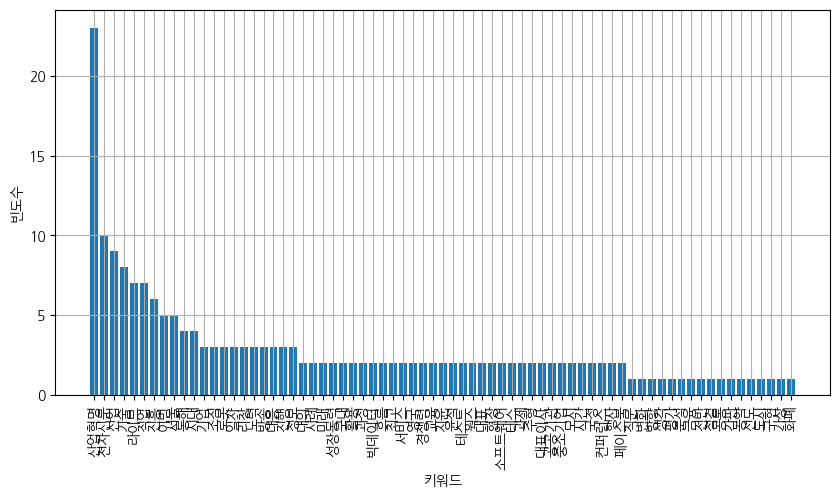

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid()

sorted_keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_values, align='center')
plt.xticks(range(len(word_count)), list(sorted_keys), rotation=90)
plt.show()

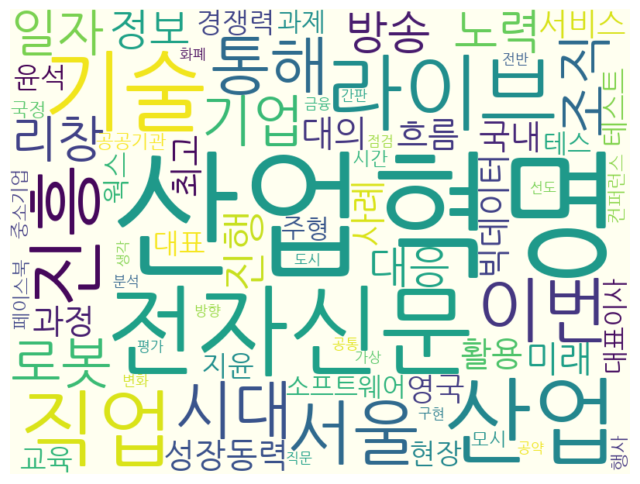

In [34]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 한글 폰트 설정
path = '/content/drive/MyDrive/통계분석/8장_data/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)



# WordCloud 생성 시 한글 폰트 경로 지정
wc = WordCloud(font_path=path, background_color='ivory', width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)

# WordCloud 시각화
plt.figure(figsize=(8,8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [35]:
# mecab()

from konlpy.tag import Mecab
mecab = Mecab()

message_n = nlp.nouns(message)

word_count = dict()

for tag, counts in Count_n.most_common(80):
    if len(str(tag)) > 1:
        word_count[tag] = counts
        print("%s : %d " % (tag, counts))


산업혁명 : 23 
전자신문 : 10 
산업 : 9 
기술 : 8 
라이브 : 7 
직업 : 7 
진흥 : 6 
이번 : 5 
서울 : 5 
통해 : 4 
시대 : 4 
기업 : 3 
조직 : 3 
로봇 : 3 
일자 : 3 
리창 : 3 
노력 : 3 
방송 : 3 
대응 : 3 
진행 : 3 
정보 : 3 
대의 : 2 
사례 : 2 
미래 : 2 
성장동력 : 2 
국내 : 2 
활용 : 2 
과정 : 2 
빅데이터 : 2 
흐름 : 2 
최고 : 2 
서비스 : 2 
영국 : 2 
경쟁력 : 2 
교육 : 2 
지윤 : 2 
윤석 : 2 
테스트 : 2 
웍스 : 2 
대표 : 2 
현장 : 2 
소프트웨어 : 2 
테스 : 2 
과제 : 2 
주형 : 2 
대표이사 : 2 
공공기관 : 2 
중소기업 : 2 
모시 : 2 
시간 : 2 
국정 : 2 
컨퍼런스 : 2 
행사 : 2 
페이스북 : 2 
직문 : 1 
변화 : 1 
방향 : 1 
생각 : 1 
평가 : 1 
분석 : 1 
금융 : 1 
전반 : 1 
점검 : 1 
공통 : 1 
간판 : 1 
공약 : 1 
선도 : 1 
도시 : 1 
구현 : 1 
가상 : 1 
화폐 : 1 
